# MISSING VALUE, OUTLIER, DAN TRANSFORMASI DATA
Nama : Arsinta Safira Devi

NPM : 23083010012

Kelas : EDA (A)

Pada dataset ini telah dilakukan pengecekan missing value atau nilai yang hilang, agar dataset ini dapat dianalisis lebih lanjut

# MENGECEK MISSING VALUE

In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/arsinta/Downloads/shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Dalam data ini tidak ditemukan adanya missing value atau nilai yang hilang, jika tidak ada missing value maka kita bisa membuat dummy variabel

# MEMBUAT DUMMY VARIABEL

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_columns)

categorical_columns_to_encode = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 
                                 'Color', 'Season', 'Subscription Status', 'Shipping Type', 
                                 'Discount Applied', 'Promo Code Used', 'Payment Method', 
                                 'Frequency of Purchases']
df_encoded = pd.get_dummies(df, columns=categorical_columns_to_encode, drop_first=True)
display(df_encoded.head())
print(df_encoded.info())

Kolom kategorikal: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53,3.1,14,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,19,64,3.1,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,50,73,3.1,23,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,21,90,3.5,49,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,45,49,2.7,31,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Columns: 131 entries, Customer ID to Frequency of Purchases_Weekly
dtypes: float64(1), int64(4), uint8(126)
memory usage: 632.4 KB
None


# MENDETEKSI OUTLIER

In [18]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

outliers_dict = {col: detect_outliers_iqr(df, col) for col in numeric_columns}

{col: len(outliers_dict[col]) for col in numeric_columns}


{'Age': 0,
 'Purchase Amount (USD)': 0,
 'Review Rating': 0,
 'Previous Purchases': 0}

Dalam data ini menggunakan metode IQR untuk mencari outlier yang ada dalam data,
ternyata data ini tidak memiliki outlier, selanjutnya kita bisa membuat kategorisasi variabel

# KATEGORISASI VARIABEL

In [27]:
df['Age Category'] = pd.cut(df['Age'], 
                            bins=[0, 18, 35, 50, 100], 
                            labels=['Remaja', 'Anak Muda', 'Dewasa', 'Lansia'])

df['Purchase Category'] = pd.cut(df['Purchase Amount (USD)'], 
                                 bins=[0, 50, 100, 1000], 
                                 labels=['Kecil', 'Sedang', 'Besar'])

df['Rating Category'] = pd.cut(df['Review Rating'], 
                               bins=[0, 2, 4, 5], 
                               labels=['Biasa Saja', 'Puas', 'Sangat Puas'])

df['Loyalty Category'] = pd.cut(df['Previous Purchases'], 
                                bins=[0, 10, 30, 100], 
                                labels=['Customer Baru', 'Customer Reguler', 'Customer Setia'])

df[['Age', 'Age Category', 'Purchase Amount (USD)', 'Purchase Category', 
    'Review Rating', 'Rating Category', 'Previous Purchases', 'Loyalty Category']].head()


,Age,Age Category,Purchase Amount (USD),Purchase Category,Review Rating,Rating Category,Previous Purchases,Loyalty Category
0,55,Lansia,53,Sedang,3.1,Puas,14,Customer Reguler
1,19,Anak Muda,64,Sedang,3.1,Puas,2,Customer Baru
2,50,Dewasa,73,Sedang,3.1,Puas,23,Customer Reguler
3,21,Anak Muda,90,Sedang,3.5,Puas,49,Customer Setia
4,45,Dewasa,49,Kecil,2.7,Puas,31,Customer Setia


Dalam data ini kita mengkategorisasikan variabel dengan data types float dan integer, dan menjadikannya menjadi beberapa kategori

# TRANSFORMASI DATA

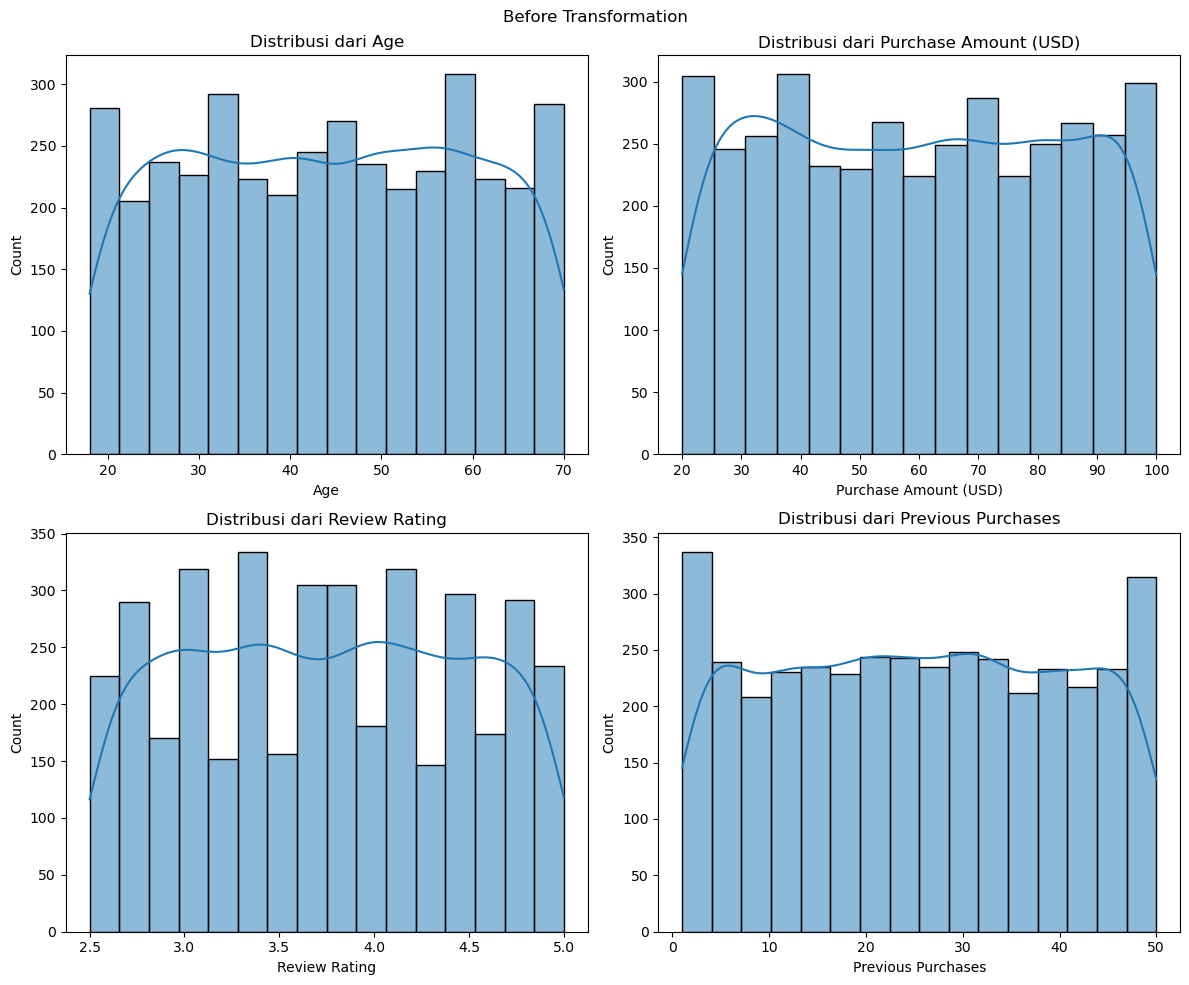

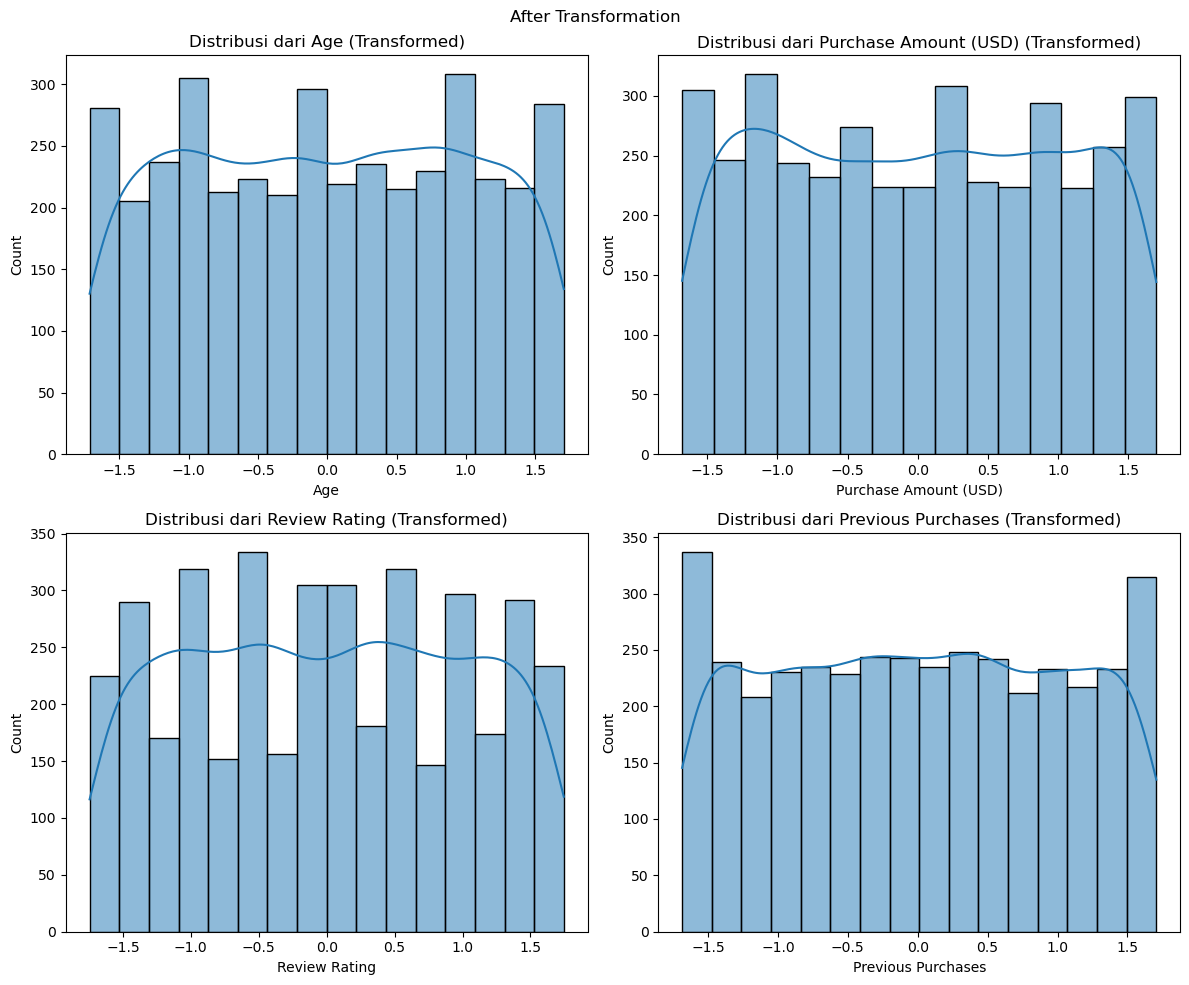

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Category,Purchase Category,Rating Category,Loyalty Category
0,1,0.718913,1,Blouse,1,-0.285629,Kentucky,0,7,3,...,1,1,1,-0.785831,5,3,Lansia,Sedang,Puas,Customer Reguler
1,2,-1.648629,1,Sweater,1,0.178852,Maine,0,12,3,...,1,1,1,-1.616552,1,3,Anak Muda,Sedang,Puas,Customer Baru
2,3,0.390088,1,Jeans,1,0.558882,Massachusetts,2,12,1,...,2,1,1,-0.162789,2,6,Dewasa,Sedang,Puas,Customer Reguler
3,4,-1.517099,1,Sandals,2,1.276716,Rhode Island,1,12,1,...,3,1,1,1.637107,4,6,Anak Muda,Sedang,Puas,Customer Setia
4,5,0.061263,1,Blouse,1,-0.454531,Oregon,1,21,1,...,2,1,1,0.391025,4,0,Dewasa,Kecil,Puas,Customer Setia


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Before Transformation')

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribusi dari {col}')

plt.tight_layout()
plt.show()

scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('After Transformation')

for i, col in enumerate(numeric_cols):
    sns.histplot(data_scaled[col], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribusi dari {col} (Transformed)')

plt.tight_layout()
plt.show()

categorical_cols = ['Gender', 'Category', 'Size', 'Color', 'Season', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 
                    'Frequency of Purchases']

le = LabelEncoder()
for col in categorical_cols:
    data_scaled[col] = le.fit_transform(data_scaled[col])

data_scaled.head()
